<a href="https://colab.research.google.com/github/BarnaliBhowmik/PythonProjects/blob/main/ChurnSurvivalAnalysisAndPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [41]:
df = pd.read_csv("customer_churn_data.csv")

In [44]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [50]:
df.isna()
# df.isna().sum() - in numbers form
# df.isna().sum().sum - for individual sum

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,True,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,True,False,False,False


In [51]:
df["InternetService"]

,InternetService
0,Fiber Optic
1,Fiber Optic
2,Fiber Optic
3,DSL
4,NaN
...,...
995,Fiber Optic
996,NaN
997,Fiber Optic
998,NaN


In [53]:
df["InternetService"] = df["InternetService"].fillna("")

In [54]:
df.isna().sum().sum()

np.int64(0)

In [55]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [56]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [59]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [63]:
numeric_columns = df.select_dtypes(include="number")

In [65]:
numeric_columns.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


So,
-1 = strong negative correlations & 1 = strong positive correlations

In [66]:
df["Churn"].value_counts()

,count
Churn,
Yes,883
No,117


In [67]:
type(df["Churn"].value_counts())

pandas.core.series.Series

In [73]:
import matplotlib.pyplot as plt

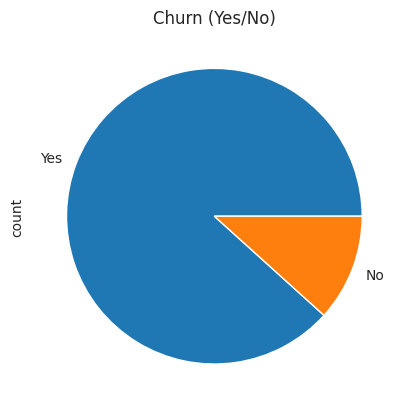

In [75]:
df["Churn"].value_counts().plot(kind="pie")
# You can also do: df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn (Yes/No)")
plt.show()

In [76]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [77]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [80]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [81]:
df.groupby("Churn")["Tenure"].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [82]:
df.groupby("Churn")["Age"].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


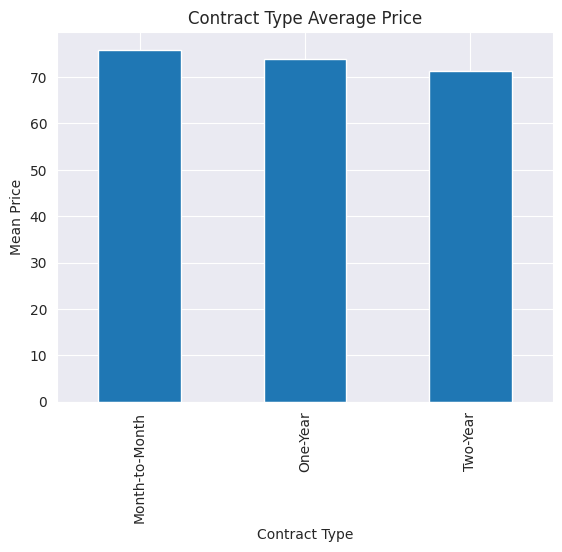

In [84]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

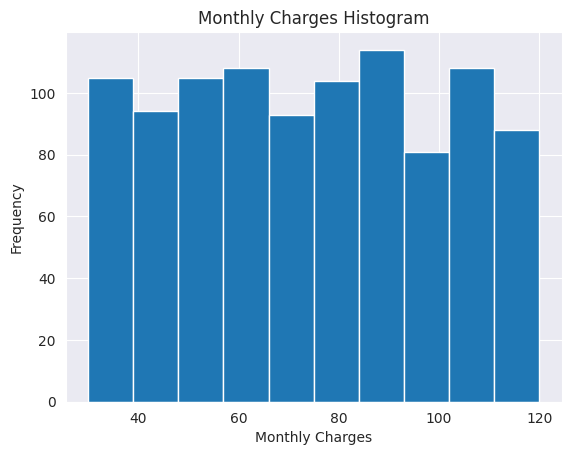

In [86]:
plt.hist(df["MonthlyCharges"])
plt.title("Monthly Charges Histogram")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

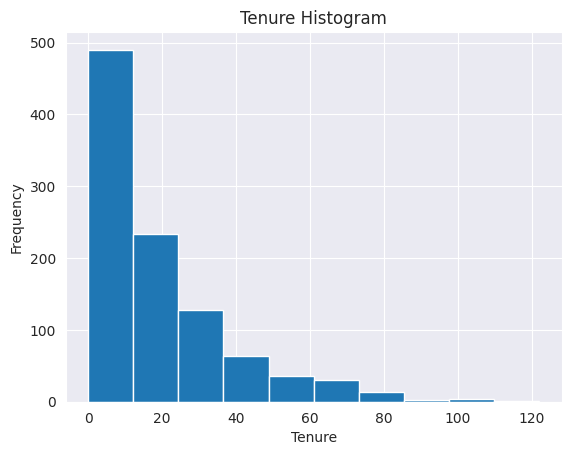

In [87]:
plt.hist(df["Tenure"])
plt.title("Tenure Histogram")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

In [88]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [89]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [151]:
# Convert 'Churn' column to numerical (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Y = df[['Churn']]
X = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]

In [95]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [97]:
X["Gender"].apply(lambda x: 1 if x=="Female" else 0)

,Gender
0,0
1,0
2,1
3,1
4,0
...,...
995,0
996,0
997,1
998,0


In [98]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01


In [99]:
type(X["Gender"][0])

str

In [100]:
y.head(2)

,Churn
0,Yes
1,Yes


In [101]:
y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [103]:
type(Y["Churn"][0])

str

In [96]:
Y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Added random_state for reproducibility



*   Training set: X_train & y_train
*   Testing set: X_test(make predictions) & y_test(comparing predictions)



In [108]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [109]:
# Scaling Data
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [120]:
X_train = scaler.fit_transform(X_train)

In [121]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [122]:
X_test = scaler.fit_transform(X_test)

In [123]:
X_train

array([[-2.53630285, -0.49981987,  0.10827332,  1.0862028 ],
       [-1.50344855,  0.47636434,  1.35728231,  1.0862028 ],
       [-0.05745252, -0.01172777,  0.92490319, -0.9206384 ],
       ...,
       [-0.78045053, -0.60828479,  0.32717981,  1.0862028 ],
       [-1.81330484, -0.60828479,  1.49545732,  1.0862028 ],
       [-0.98702139,  0.80175907,  0.98778058, -0.9206384 ]])

In [124]:
X_test

array([[ 4.75468878e-01, -3.94419014e-01, -1.17808842e+00,
        -9.51189731e-01],
       [-6.01803554e-01,  1.33116417e+00, -6.84923435e-01,
        -9.51189731e-01],
       [-5.03869697e-01, -6.40930898e-01, -1.22400105e+00,
         1.05131497e+00],
       [-1.18940670e+00, -8.87442782e-01,  9.63181682e-01,
         1.05131497e+00],
       [ 9.65138165e-01,  1.18325704e+00, -1.56082560e+00,
         1.05131497e+00],
       [-1.38527441e+00,  6.40930898e-01, -6.31886431e-01,
        -9.51189731e-01],
       [ 1.45480745e+00,  1.97209507e-01,  8.21881604e-01,
         1.05131497e+00],
       [-1.12134267e-01, -4.93023768e-01, -1.07320180e+00,
         1.05131497e+00],
       [ 2.79601163e-01, -3.45116637e-01, -1.04787070e+00,
        -9.51189731e-01],
       [ 1.81667306e-01,  8.88178420e-18,  4.33207438e-01,
        -9.51189731e-01],
       [ 3.77535020e-01, -8.87442782e-01,  6.56833613e-01,
         1.05131497e+00],
       [ 8.67204308e-01, -1.03534991e+00,  2.43619938e-01,
      

Data is scaled now.
Now, we focus on modelling.


*   We'll define a function for gettting model preference.


In [128]:
from sklearn.metrics import accuracy_score
# This will be the metric for evaluating classification models.
# It takes values from o to 1; Value closer to 1 is preferred/better.

def modelperformance(predictions):
  print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [129]:
from sklearn.model_selection import GridSearchCV
# For hyper parameter tuning on models like decision tree or random forest, we use GridSearch

In [131]:
# For Logistic Regression
from sklearn.linear_model import LogisticRegression

In [132]:
# Initialize LR
log_model = LogisticRegression()

In [134]:
# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [135]:
# Trainig Model
log_model.fit(X_train, y_train)

LogisticRegression()

In [136]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [138]:
log_model.predict([[40,0,20,80]])[0]

'Yes'

In [139]:
log_model.predict(X_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 

In [140]:
y_pred = log_model.predict(X_test)

In [141]:
y_test

,Churn
888,No
458,Yes
633,Yes
985,Yes
629,Yes
...,...
239,No
779,No
852,No
346,No


In [142]:
modelperformance(y_pred)

Accuracy score on model is 0.85


In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform", "distance"],
}

In [147]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
# splits the data into 5 folds

In [156]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [149]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [157]:
gridkn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [158]:
# Evaluate the KNeighborsClassifier model
knn_predictions = gridkn.predict(X_test)
modelperformance(knn_predictions)

Accuracy score on model is 0.88


In [155]:
# One-hot encode the 'Gender' column
X_train = pd.get_dummies(X_train, columns=['Gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Gender'], drop_first=True)

# Now scale the numerical features (including the new one-hot encoded 'Gender' column)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

display(X_train[:5])

array([[-0.27936177,  2.28080878,  0.92037124,  1.06725697],
       [ 0.02664838,  0.11295321,  1.12221019, -0.93698147],
       [-0.38136516,  0.69457299, -1.00540975,  1.06725697],
       [-0.48336854,  1.64631446,  1.58525248, -0.93698147],
       [ 1.55669916,  1.80493804,  0.60019927, -0.93698147]])

In [159]:
y_pred = gridkn.predict(X_test)

In [160]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [162]:
from sklearn.svm import SVC

In [163]:
svm = SVC()

In [164]:
param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"],
}

In [165]:
gridsvc = GridSearchCV(SVC(), param_grid, cv=5)

In [166]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [167]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [168]:
y_pred = gridsvc.predict(X_test)

In [169]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [171]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [173]:
from sklearn.tree import DecisionTreeClassifier
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [175]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [177]:
# Make predictions on the test set using the best Decision Tree model
tree_predictions = grid_tree.predict(X_test)

# Evaluate the Decision Tree model
modelperformance(tree_predictions)

Accuracy score on model is 0.845


In [176]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [178]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [179]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [180]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [181]:
param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2, 3, 4],
    "bootstrap": [True, False]
}

In [182]:
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [183]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [184]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [185]:
grid_rfc.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [186]:
y_pred = grid_rfc.predict(X_test)

In [187]:
modelperformance(y_pred)

Accuracy score on model is 0.85


In [188]:
best_model = grid_rfc

In [189]:
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']